In [1]:
import json
from random import shuffle, seed
import os
import re
import pickle
import pandas as pd
from NLP_For_E_commerce_main.build_vocab import Vocabulary
from NLP_For_E_commerce_main.coco import COCO
import multiprocessing as mp
from PIL import Image

In [2]:
images = os.listdir('/data/liufengyuan/NLPinFinance/Image')
shuffle(images)
val = images[:50000]
test = images[50000:100000]
train = images[100000:]

In [3]:
def transfer_image(item, target):
    with open(os.path.join('/data/liufengyuan/NLPinFinance/Image/', item), 'r+b') as f:
        try:
            with Image.open(f) as img:
                img.save(os.path.join('/data/liufengyuan/NLPinFinance/trainvalImage/' + target, item), img.format)
        except:
            item

In [4]:
len(val)

50000

In [7]:
pool = mp.Pool(48)
for item in range(len(train)):
    process = pool.apply_async(transfer_image, args = (train[item], 'train'))
pool.close()
pool.join()

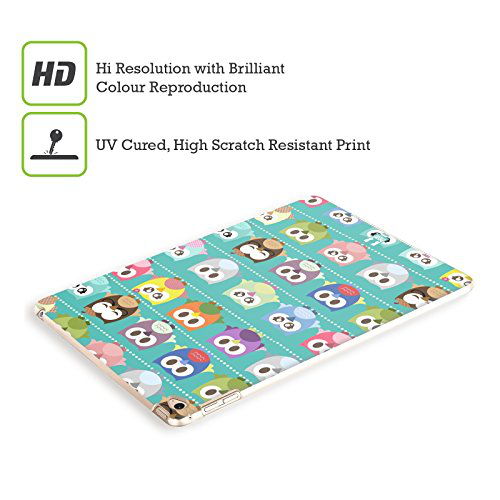

In [4]:
with open(os.path.join('/data/liufengyuan/NLPinFinance/Image/', 'B00HO0MQQU.jpg'), 'r+b') as f:
    with Image.open(f) as img:
        display(img)

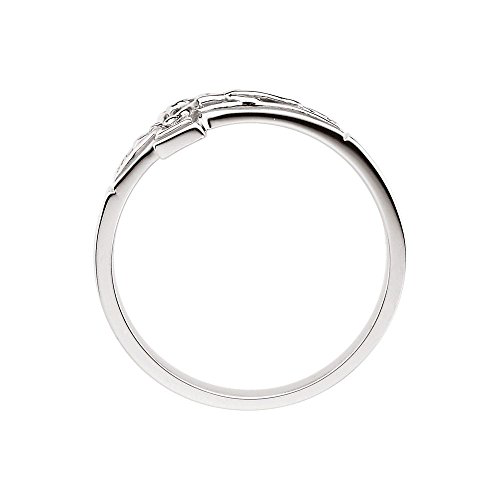

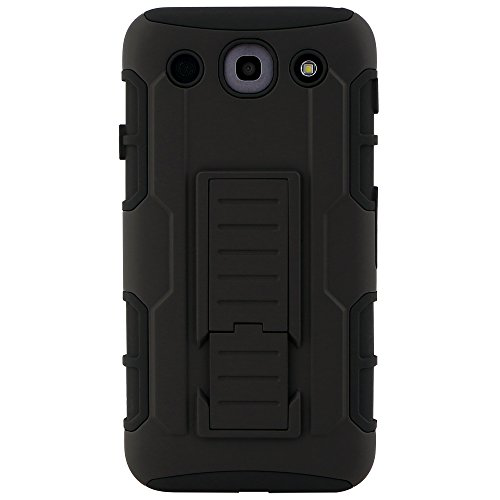

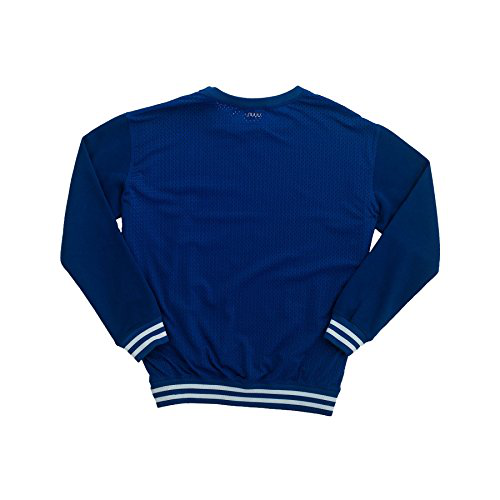

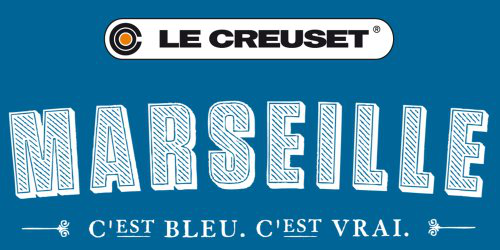

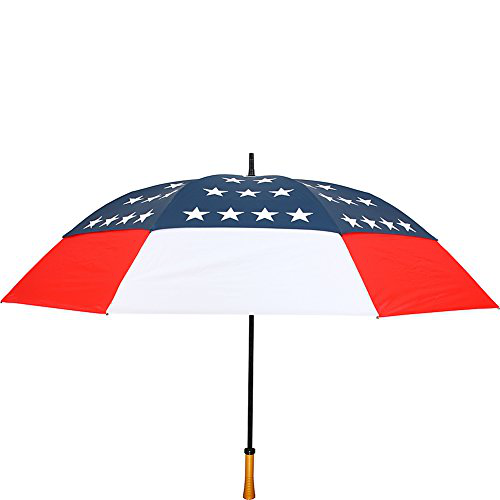

In [5]:
count = 0
fail = 0
i = 0
for item in val:
    i += 1
    with open(os.path.join('/data/liufengyuan/NLPinFinance/Image/', item), 'r+b') as f:
        try:
            with Image.open(f) as img:
                display(img)
                #img.save(os.path.join('/data/liufengyuan/NLPinFinance/trainvalImage/val', item), img.format)
                #break
        except:
            fail += 1
            print(fail)
    if i == 5:
        break

In [2]:
train = os.listdir('/data/liufengyuan/NLPinFinance/trainvalImage/train')
test = os.listdir('/data/liufengyuan/NLPinFinance/trainvalImage/test')
val = os.listdir('/data/liufengyuan/NLPinFinance/trainvalImage/val')

In [3]:
f_save = open('/data/liufengyuan/NLPinFinance/Combined_Data.json', 'r')
total_data = json.load(f_save)
f_save.close()

In [6]:
manager = mp.Manager()

In [7]:
new_data_val = manager.list()
new_data_test = manager.list()
new_data_train = manager.list()

In [8]:
def select_data(item, new_data_val, new_data_test, new_data_train):
    id = item['asin'] + '.jpg'
    if id in val:
        new_data_val.append(item)
    elif id in test:
        new_data_test.append(item)
    elif id in train:
        new_data_train.append(item)

In [9]:
pool = mp.Pool(48)
for item in total_data[:100]:
    pool.apply_async(select_data, args = (item, new_data_val, new_data_test, new_data_train))
pool.close()
pool.join()

In [10]:
print(len(new_data_val), len(new_data_test), len(new_data_train))

3 0 97


In [16]:
list(new_data_val)

[{'asin': '8199407514',
  'title': 'OEM Mid-Size Wall/Home Charger for Motorola ROKR E8 Phone! Official Original Equipment and Manufacturer (AC 110-220 volt)',
  'feature': ['Safely charge your phone from your car using the original authentic brand!',
   'Using the authentic OEM brand will ensure your phones warranty is never voided!',
   'Use of this official charger will prolong your batteries life compare to others!',
   'As designed for your warranty, stage one charges quickly to 80%.',
   'Then, stage two slowly and precisely charges to 100 percent.'],
  'description': ['Official OEM Rapid/Fast Rate Home Charger for Motorola i465 Phone with fixed blades!  Original Equipment and Manufacturer (AC 110-220 volt)'],
  'imageURLHighRes': ['https://images-na.ssl-images-amazon.com/images/I/41Xzb3-WT%2BL.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/414ev9iAHfL.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/41Ct6cDIXnL.jpg']},
 {'asin': '9713248031',
  'title': 'Ch

In [18]:
output_file = list(new_data_val)

In [21]:
f_save = open('/home/liufengyuan/NLPinFinance/test.json', 'w')
json.dump(list(new_data_val), f_save)
f_save.close()

In [48]:
read_file = json.load( open('/data/liufengyuan/NLPinFinance/COCOdata/annotations/karpathy_split_train.json', 'rb') )

In [49]:
read_file

{'type': 'caption',
 'info': {'description': 'COCO 2014 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2014,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'licenses': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
   'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
   'id': 2,
   'name': 'Attribution-NonCommercial License'},
  {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
   'id': 3,
   'name': 'Attribution-NonCommercial-NoDerivs License'},
  {'url': 'http://creativecommons.org/licenses/by/2.0/',
   'id': 4,
   'name': 'Attribution License'},
  {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
   'id': 5,
   'name': 'Attribution-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
   'id': 6,
   'name': 'Attribution-NoDerivs License'},
  {'url': 'http://flickr.com/commons/usage/',
   'id': 

In [ ]:
f_save = open('/data/liufengyuan/NLPinFinance/new_data_val.json', 'w')
json.dump(new_data_val, f_save)
f_save.close()
f_save = open('/data/liufengyuan/NLPinFinance/new_data_test.json', 'w')
json.dump(new_data_test, f_save)
f_save.close() 
f_save = open('/data/liufengyuan/NLPinFinance/new_data_train.json', 'w')
json.dump(new_data_train, f_save)
f_save.close() 

In [14]:
len(total_data)

4527550

In [13]:
for i, item in enumerate(file_read):
    print(i, item)
    break

0 {'asin': '7122120015', 'title': 'Juicy Couture Durable 3 Layers Crest Case for Iphone 4 Hot Pink+free Screen Protector', 'feature': ['Lightweight polycarbonate hard shell', 'Two-piece snap-together design', 'Full access to all controls', 'Hi-res image on case', 'durable 3 layers design'], 'description': ['Apple Recommends For Wrap your iPhone 4 in unique Juicy Couture style and protection. Made of a lightweight polycarbonate, the Juicy Couture Crest case snaps securely around your iPhone 4. With a hard protective shell, you won\'t have to worry about dings and scratches marking your iPhone as you go about your day. So "Have a Juicy Day" and enjoy every moment.'], 'imageURLHighRes': ['https://images-na.ssl-images-amazon.com/images/I/4124aXFMHmL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41fEquco9OL.jpg']}


In [19]:
import string
text = 'Apple Recommends For Wrap your iPhone 4 in unique Juicy Couture style and protection. Made of a lightweight polycarbonate, the Juicy Couture Crest case snaps securely around your iPhone 4. With a hard protective shell, you won\'t have to worry about dings and scratches marking your iPhone as you go about your day. So "Have a Juicy Day" and enjoy every moment.'

In [13]:
title = 'Eighty-seven miles to go\n, yet.  Onward!'

In [15]:
pat = '[a-zA-Z]+'

In [20]:
text = re.sub("won\'t", "will not", text, flags=re.S)
re.findall(pat, text.lower())

['apple',
 'recommends',
 'for',
 'wrap',
 'your',
 'iphone',
 'in',
 'unique',
 'juicy',
 'couture',
 'style',
 'and',
 'protection',
 'made',
 'of',
 'a',
 'lightweight',
 'polycarbonate',
 'the',
 'juicy',
 'couture',
 'crest',
 'case',
 'snaps',
 'securely',
 'around',
 'your',
 'iphone',
 'with',
 'a',
 'hard',
 'protective',
 'shell',
 'you',
 'will',
 'not',
 'have',
 'to',
 'worry',
 'about',
 'dings',
 'and',
 'scratches',
 'marking',
 'your',
 'iphone',
 'as',
 'you',
 'go',
 'about',
 'your',
 'day',
 'so',
 'have',
 'a',
 'juicy',
 'day',
 'and',
 'enjoy',
 'every',
 'moment']

In [21]:
os.path.exists('/home/liufengyuan/NLPinFinance/WordList.csv')

True

In [7]:
tokens = str( title ).lower().translate( string.punctuation ).strip().split()
tokens

['apple',
 'recommends',
 'for',
 'wrap',
 'your',
 'iphone',
 '4',
 'in',
 'unique',
 'juicy',
 'couture',
 'style',
 'and',
 'protection.',
 'made',
 'of',
 'a',
 'lightweight',
 'polycarbonate,',
 'the',
 'juicy',
 'couture',
 'crest',
 'case',
 'snaps',
 'securely',
 'around',
 'your',
 'iphone',
 '4.',
 'with',
 'a',
 'hard',
 'protective',
 'shell,',
 'you',
 "won't",
 'have',
 'to',
 'worry',
 'about',
 'dings',
 'and',
 'scratches',
 'marking',
 'your',
 'iphone',
 'as',
 'you',
 'go',
 'about',
 'your',
 'day.',
 'so',
 '"have',
 'a',
 'juicy',
 'day"',
 'and',
 'enjoy',
 'every',
 'moment.']

In [9]:
with open( '/data/liufengyuan/NLPinFinance/COCOdata/vocab.pkl', 'rb') as f: # vocab.pkl
    vocab = pickle.load( f )

In [10]:
vocab.word2idx

{'<pad>': 0,
 '<start>': 1,
 '<end>': 2,
 '<unk>': 3,
 'there': 4,
 'are': 5,
 'many': 6,
 'items': 7,
 'that': 8,
 'layer': 9,
 'out': 10,
 'on': 11,
 'the': 12,
 'floor': 13,
 'several': 14,
 'various': 15,
 'laying': 16,
 'next': 17,
 'to': 18,
 'a': 19,
 'bag': 20,
 '.': 21,
 'gum': 22,
 ',': 23,
 'pen': 24,
 'glasses': 25,
 'water': 26,
 'bottle': 27,
 'cell': 28,
 'phone': 29,
 'and': 30,
 'other': 31,
 'objects': 32,
 'of': 33,
 'placed': 34,
 'ground': 35,
 'content': 36,
 'purse': 37,
 'organized': 38,
 'table': 39,
 'brown': 40,
 'piece': 41,
 'luggage': 42,
 'passport': 43,
 'camera': 44,
 'sunglasses': 45,
 'wallet': 46,
 'cellphone': 47,
 'papers': 48,
 'two': 49,
 'bottles': 50,
 'wine': 51,
 'sitting': 52,
 'top': 53,
 'glass': 54,
 'corkscrew': 55,
 'wooden': 56,
 'white': 57,
 'behind': 58,
 'opener': 59,
 'man': 60,
 'is': 61,
 'standing': 62,
 'in': 63,
 'dirt': 64,
 'with': 65,
 'bat': 66,
 'baseball': 67,
 'batter': 68,
 'getting': 69,
 'ready': 70,
 'swing': 71,
 

In [25]:
wordlist = pd.read_csv('/home/liufengyuan/NLPinFinance/WordList.csv')

In [26]:
len(wordlist)

21474

In [42]:
wordlist.iloc[12467:12473]

,word,count
12469,nullable,1928
12470,nullify,550
12471,numb,76
12472,number,85638
12473,numberless,139
12474,numbness,209


In [35]:
wordlist['word'] != 'null'

0        True
1        True
2        True
3        True
4        True
         ... 
21469    True
21470    True
21471    True
21472    True
21473    True
Name: word, Length: 21474, dtype: bool

In [40]:
wordlist = wordlist[~wordlist['word'].isnull()]

In [38]:
wordlist = wordlist[wordlist['word'] != 'NaN']

In [41]:
len(wordlist)

21472

In [43]:
wordlist.to_csv('/home/liufengyuan/NLPinFinance/WordList.csv')

In [7]:
for index, row in wordlist.iterrows():
    print(index, row['word'], row['count'])
    break

0 a 14740565


In [10]:
combined_data = json.load( open( '/data/liufengyuan/NLPinFinance/Combined_Data.json', 'r' ) )

In [11]:
combined_data[:3]

[{'asin': '7122120015',
  'title': 'Juicy Couture Durable 3 Layers Crest Case for Iphone 4 Hot Pink+free Screen Protector',
  'feature': ['Lightweight polycarbonate hard shell',
   'Two-piece snap-together design',
   'Full access to all controls',
   'Hi-res image on case',
   'durable 3 layers design'],
  'description': ['Apple Recommends For Wrap your iPhone 4 in unique Juicy Couture style and protection. Made of a lightweight polycarbonate, the Juicy Couture Crest case snaps securely around your iPhone 4. With a hard protective shell, you won\'t have to worry about dings and scratches marking your iPhone as you go about your day. So "Have a Juicy Day" and enjoy every moment.'],
  'imageURLHighRes': ['https://images-na.ssl-images-amazon.com/images/I/4124aXFMHmL.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/41fEquco9OL.jpg']},
 {'asin': '7391002801',
  'title': 'Silver Elegant Butterfly Foot Ankle Chain Summer Beach Bracelet Evil Eye Charm',
  'feature': ['Item is Brand 

In [17]:
for file in filenames:
    this_file = json.load( open(global_path + file, 'r') )
    number = len(this_file['images'])
    print(f'File {file} has {number} number of files')

File person_keypoints_val2014.json has 40504 number of files
File captions_val2014.json has 40504 number of files
File karpathy_split_test.json has 5000 number of files
File captions_train2014.json has 82783 number of files
File person_keypoints_train2014.json has 82783 number of files
File instances_train2014.json has 82783 number of files
File instances_val2014.json has 40504 number of files
File karpathy_split_train.json has 113287 number of files
File karpathy_split_val.json has 5000 number of files


In [15]:
transform = json.load( open('/data/liufengyuan/NLPinFinance/COCOdata/annotations/karpathy_split_train.json', 'r') )

In [16]:
transform.keys()

dict_keys(['type', 'info', 'licenses', 'images', 'annotations'])

In [19]:
transform['annotations'][:3]

[{'image_id': 251016,
  'id': 463764,
  'caption': 'there are many items that are layer out on the floor'},
 {'image_id': 251016,
  'id': 469320,
  'caption': 'Several various items laying next to a bag.'},
 {'image_id': 251016,
  'id': 471123,
  'caption': 'Gum, pen, glasses, water bottle, cell phone, and other objects are out of the bag, and placed on the ground. '}]

In [18]:
len(transform['images'])

113287

In [29]:
validation = json.load( open('/data/liufengyuan/NLPinFinance/COCOdata/annotations/karpathy_split_val.json', 'r') )

In [30]:
validation

{'type': 'caption',
 'info': {'description': 'COCO 2014 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2014,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'licenses': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
   'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
   'id': 2,
   'name': 'Attribution-NonCommercial License'},
  {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
   'id': 3,
   'name': 'Attribution-NonCommercial-NoDerivs License'},
  {'url': 'http://creativecommons.org/licenses/by/2.0/',
   'id': 4,
   'name': 'Attribution License'},
  {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
   'id': 5,
   'name': 'Attribution-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
   'id': 6,
   'name': 'Attribution-NoDerivs License'},
  {'url': 'http://flickr.com/commons/usage/',
   'id': 

In [16]:
len(validation['images'])

5000

In [13]:
transform['images']

[{'license': 3,
  'file_name': 'COCO_train2014_000000251016.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000251016.jpg',
  'height': 403,
  'width': 640,
  'date_captured': '2013-11-17 15:36:44',
  'flickr_url': 'http://farm3.staticflickr.com/2606/3688475742_3135ccf90f_z.jpg',
  'id': 251016},
 {'license': 1,
  'file_name': 'COCO_train2014_000000098629.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000098629.jpg',
  'height': 640,
  'width': 449,
  'date_captured': '2013-11-25 19:23:45',
  'flickr_url': 'http://farm9.staticflickr.com/8039/8025111525_81b1dfaff4_z.jpg',
  'id': 98629},
 {'license': 1,
  'file_name': 'COCO_train2014_000000172197.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000172197.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-23 01:12:49',
  'flickr_url': 'http://farm7.staticflickr.com/6137/6013318786_225303936b_z.jpg',
  'id': 172197},
 {'license': 2

In [17]:
seed( 123 ) # Make it reproducible
# Change this param for quick training                                                                       -----wjy
num_val = 5000
num_test = 5000

In [21]:
val = json.load( open('/data/liufengyuan/NLPinFinance/COCOdata/annotations/captions_val2014.json', 'r') )
train = json.load( open('/data/liufengyuan/NLPinFinance/COCOdata/annotations/captions_train2014.json', 'r') )

In [22]:
train.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [23]:
len(val['images'])

40504

In [24]:
len(train['images'])

82783

In [25]:
imgs = val['images'] + train['images']
annots = val['annotations'] + train['annotations']

In [26]:
imgs[:2]

[{'license': 3,
  'file_name': 'COCO_val2014_000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895},
 {'license': 4,
  'file_name': 'COCO_val2014_000000522418.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000522418.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-14 11:38:44',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'id': 522418}]

In [28]:
annots[:2]

[{'image_id': 203564,
  'id': 37,
  'caption': 'A bicycle replica with a clock as the front wheel.'},
 {'image_id': 179765,
  'id': 38,
  'caption': 'A black Honda motorcycle parked in front of a garage.'}]

In [22]:
shuffle( imgs )

In [23]:
dataset = {}
dataset[ 'val' ] = imgs[ :num_val ]
dataset[ 'test' ] = imgs[ num_val: num_val + num_test ]
dataset[ 'train' ] = imgs[ num_val + num_test: ]

In [25]:
itoa = {}
for a in annots:
    imgid = a['image_id']
    if not imgid in itoa: itoa[imgid] = []
    itoa[imgid].append(a)

In [26]:
a

{'image_id': 133071,
 'id': 829717,
 'caption': 'A dinner plate has a lemon wedge garnishment.'}

In [27]:
itoa

{203564: [{'image_id': 203564,
   'id': 37,
   'caption': 'A bicycle replica with a clock as the front wheel.'},
  {'image_id': 203564,
   'id': 181,
   'caption': 'The bike has a clock as a tire.'},
  {'image_id': 203564,
   'id': 478,
   'caption': 'A black metal bicycle with a clock inside the front wheel.'},
  {'image_id': 203564,
   'id': 6637,
   'caption': 'A bicycle figurine in which the front wheel is replaced with a clock\n'},
  {'image_id': 203564,
   'id': 6802,
   'caption': 'A clock with the appearance of the wheel of a bicycle '}],
 179765: [{'image_id': 179765,
   'id': 38,
   'caption': 'A black Honda motorcycle parked in front of a garage.'},
  {'image_id': 179765,
   'id': 182,
   'caption': 'A Honda motorcycle parked in a grass driveway'},
  {'image_id': 179765,
   'id': 479,
   'caption': 'A black Honda motorcycle with a dark burgundy seat.'},
  {'image_id': 179765,
   'id': 6638,
   'caption': 'Ma motorcycle parked on the gravel in front of a garage'},
  {'image_i

In [28]:
json_data = {}
info = train['info']
licenses = train['licenses']

split = [ 'val', 'test', 'train' ]

In [11]:
for subset in split:
    
    json_data[ subset ] = { 'type':'caption', 'info':info, 'licenses': licenses,
                           'images':[], 'annotations':[] }
    
    for img in dataset[ subset ]:
        
        img_id = img['id']
        anns = itoa[ img_id ]
        
        json_data[ subset ]['images'].append( img )
        json_data[ subset ]['annotations'].extend( anns )

[{'image_id': 203564,
  'id': 37,
  'caption': 'A bicycle replica with a clock as the front wheel.'},
 {'image_id': 179765,
  'id': 38,
  'caption': 'A black Honda motorcycle parked in front of a garage.'},
 {'image_id': 322141,
  'id': 49,
  'caption': 'A room with blue walls and a white sink and door.'},
 {'image_id': 16977,
  'id': 89,
  'caption': 'A car that seems to be parked illegally behind a legally parked car'},
 {'image_id': 106140,
  'id': 98,
  'caption': 'A large passenger airplane flying through the air.'},
 {'image_id': 106140,
  'id': 101,
  'caption': 'There is a GOL plane taking off in a partly cloudy sky.'},
 {'image_id': 322141,
  'id': 109,
  'caption': 'Blue and white color scheme in a small bathroom.'},
 {'image_id': 322141,
  'id': 121,
  'caption': 'This is a blue and white bathroom with a wall sink and a lifesaver on the wall.'},
 {'image_id': 322141,
  'id': 163,
  'caption': 'A blue boat themed bathroom with a life preserver on the wall'},
 {'image_id': 203